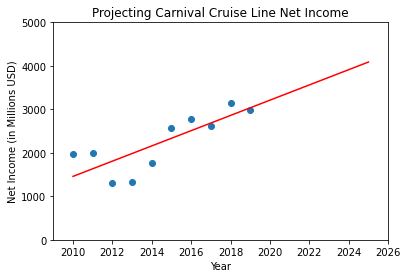

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import csv


#-10 years -> +5 years.

data = pd.read_csv("Carnival net operating income2.csv")
data_train_year = data["Year"][:-6]
data_test_year = data["Year"][-6:]
data_train_income = data["Net Income in Millions"][:-6]

reg = linear_model.LinearRegression()
reg.fit(np.array(data_train_year).reshape(-1,1), np.array(data_train_income).reshape(-1,1))
prediction = reg.predict(np.array(data_test_year).reshape(-1,1))

x = np.linspace(2010,2025,16)
y = reg.coef_[0][0]*x + ((prediction[0][0]-reg.coef_[0][0]*data_test_year[10]))

plt.scatter(data_train_year,data_train_income)
plt.plot(x, y, color="Red")
plt.axis([2009,2026,0,5000])
plt.xlabel("Year")
plt.ylabel("Net Income (in Millions USD)")
plt.title("Projecting Carnival Cruise Line Net Income")
plt.show()

with open('prediction.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',quotechar=' ')
    writer.writerow(['Year','Projected Revenue'])
    for x in range(0,6):
        writer.writerow([data_test_year[x+10],prediction[x][0]])


